## Financial Transparency System

The [FTS](http://ec.europa.eu/budget/fts/index_en.htm) contains names of the beneficiaries of funds awarded by the Commission every year of the following sources of funding:

- EU budget
- European Development Fund

[read more on the data](http://ec.europa.eu/budget/fts/about_en.htm)

---

The EU also publishes [the raw data](https://data.europa.eu/euodp/en/data/dataset/FTS)




In [3]:
import pandas as pd
import numpy as np
from glob import glob
pd.set_option("max_info_columns", 150)
pd.set_option('max_colwidth',40)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

### Read the csv

In [5]:
dataset = pd.read_csv("FTS_2013-2014.csv")

### Look at the first 10 rows of the dataset

In [8]:
dataset.head(10)

,Year,Name of beneficiary,Coordinator,VAT Number of beneficiary,Address,City,Postal code,Country / Territory,Amount,Geographical Zone,Expense Type,Commitment position key,Subject of grant or contract,Responsible Department,Budget line name and number,Action Type,Funding Type,NUTS2
0,2014,REPUBLIQUE D HAITI* REPUBLIC OFHAITI,0,NaN,-,-,NaN,Haiti,"100,000,000.00",Haiti,Operational,AID.CTR.344947.01.1,STATE BUILDING CONTRACT,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN
1,2014,REPUBLIC OF GHANA* REPUBLIQUE DUGHANA,0,NaN,-,-,NaN,Ghana,"48,326,731.54",Ghana,Operational,AID.CTR.343309.01.1,Allocation of the residual European ...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN
2,2014,YE LTYOPPYA FEDERALAWI DIMOKRASIYAWI...,0,NaN,-,-,NaN,Ethiopia,"30,000,000.00",Ethiopia,Operational,AID.CTR.346145.01.1,SPSP-FIXED TRANCHE-INDIVIDUAL COMMIT...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN
3,2014,REPUBLIKA Y U RWANDA*REPUBLIQUE RWAN...,0,NaN,-,-,NaN,Rwanda,"28,000,000.00",Rwanda,Operational,AID.CTR.342984.01.1,Sector Reform Contract (SRC) to Supp...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN
4,2014,REPUBLIQUE DE COTE D IVOIRE*REPUBLIC...,0,NaN,-,-,NaN,Ivory coast,"27,000,000.00",Ivory Coast,Operational,AID.CTR.337332.01.1,Avenant 1 - Programme d'appui budgét...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN
5,2014,REPUBLICA DE MOCAMBIQUE*REPUBLIQUEDU...,0,NaN,-,-,NaN,Mozambique,"23,540,000.00",Mozambique,Operational,AID.CTR.341958.01.1,MDG Contract - FLEX 2011 - MOZAMBIQUE,Directorate-General for Development ...,B Envelope - Non-programmable aid - ...,02 Enterprise and industry,Budget support,NaN
6,2014,CENTRE REGIONAL AGRHYMET*CENTRE AGRH...,1,NaN,BOULEVARD DE UNIVERSITE 425,NIAMEY,11011,Niger,"18,000,000.00",West Africa Region,Operational,AID.CTR.346010.01.1,Appui à lopérationnalisation du « S...,Directorate-General for Development ...,Regional indicative programme (02.40...,02 Enterprise and industry,Grants,NaN
7,2014,CO OPERATIVE REPUBLIC OF GUYANA*REPU...,0,NaN,-,-,NaN,Guyana,"14,100,000.00",Guyana,Operational,AID.CTR.338880.01.1,Sea and River Defence Sector Budget ...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN
8,2014,REPUBLIC OF SIERRA LEONE*REPUBLIQUED...,0,NaN,-,-,NaN,Sierra Leone,"12,633,333.00",Sierra Leone,Operational,AID.CTR.352534.01.1,State Building Contract - Special Tr...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN
9,2014,BURKINA FASO*,0,NaN,-,-,NaN,Burkina Faso,"12,500,000.00",Burkina Faso,Operational,AID.CTR.338068.01.1,Contrat OMD - appui budgétaire pour ...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,02 Enterprise and industry,Budget support,NaN


### What names and types of columns do you have in the dataset?

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93536 entries, 0 to 93535
Data columns (total 18 columns):
Year                            93536 non-null int64
Name of beneficiary             93536 non-null object
Coordinator                     93536 non-null object
VAT Number of beneficiary       80582 non-null object
Address                         93536 non-null object
City                            93536 non-null object
Postal code                     89751 non-null object
Country / Territory             93536 non-null object
Amount                          93350 non-null float64
Geographical Zone               13617 non-null object
Expense Type                    93536 non-null object
Commitment position key         93536 non-null object
Subject of grant or contract    92390 non-null object
Responsible Department          93535 non-null object
Budget line name and number     93534 non-null object
Action Type                     93018 non-null object
Funding Type               

### How much data are you missing?

In [18]:
dataset.isnull().sum()

Year                                0
Name of beneficiary                 0
Coordinator                         0
VAT Number of beneficiary       12954
Address                             0
City                                0
Postal code                      3785
Country / Territory                 0
Amount                            186
Geographical Zone               79919
Expense Type                        0
Commitment position key             0
Subject of grant or contract     1146
Responsible Department              1
Budget line name and number         2
Action Type                       518
Funding Type                      804
NUTS2                           89468
dtype: int64

### What were the 10 most expensive projects?

In [19]:
dataset.nlargest(10, "Amount")

,Year,Name of beneficiary,Coordinator,VAT Number of beneficiary,Address,City,Postal code,Country / Territory,Amount,Geographical Zone,Expense Type,Commitment position key,Subject of grant or contract,Responsible Department,Budget line name and number,Action Type,Funding Type,NUTS2
889,2013,'REPUBLIQUE FRANCAISE*FRENCH REPUBLI...,1;0,;,-;-,-;-,;,France;Italy,"272,856,706.00",NaN,Operational,SI2.516191.8,2007-EU-06010-P : Nouvelle liaison f...,Trans-European Transport Network Exe...,Financial support for projects of co...,TEN-T: Trans-European Transport netw...,Grants,NaN
61770,2013,REPUBLIQUE DU MALI*REPUBLIC OF MALI,0,NaN,-,-,NaN,Mali,"220,000,000.00",Mali,Operational,AID.CTR.320473.01.1,Partie aide budgétaire globale du co...,Directorate-General for Development ...,A Envelope - programmable aid (02.10...,NaN,Budget support,NaN
63212,2015,REINO DE ESPANA*ROYAUME D ESPAGNEKIN...,1,NaN,-,-,NaN,Spain,"193,348,786.40",NaN,Operational,SI2.717937.1,2014-EU-TM-0600-M INEA/CEF/TRAN/M201...,Innovation and Networks Executive Ag...,Removing bottlenecks and bridging mi...,Connecting Europe Facility (CEF),Grants,NaN
33843,2014,UKRAINA*UKRAINE,0,NaN,-,-,NaN,Ukraine,"192,000,000.00",Ukraine,Operational,SCR.CTR.344231.02.1,State Building Contract for Ukraine ...,Directorate-General for Development ...,Eastern Partnership — Human rights a...,European Neighbourhood Instrument (ENI),Budget support,NaN
63213,2015,ELLINIKI DIMOKRATIA* REPUBLIQUE HELL...,1,NaN,..,.,NaN,Greece,"184,769,792.47",NaN,Operational,SI2.717190.1,2014-EL-TMC-0651-W INEA/CEF/TRAN/M20...,Innovation and Networks Executive Ag...,Connecting Europe Facility (CEF) — C...,Cohesion Fund (CF),Grants,NaN
63214,2015,COMPANIA NATIONALA DE CAI FERATE CFR...,1,RO11054529,BLVD DINICU GOLESCU 38 SECTOR 1,BUCURESTI,010873,Romania,"163,720,222.95",NaN,Operational,SI2.715960.1,THE REHABILITATION OF THE BRASOV  S...,Innovation and Networks Executive Ag...,Connecting Europe Facility (CEF) — C...,Cohesion Fund (CF),Grants,NaN
890,2013,'BASTION EUROPEAN INVESTMENTS SA*';'...,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,BE0877881474;;;;FR27552120222;BE0462...,PLACE DU CHAMP DE MARS 5;OUDE LINDES...,BRUXELLES;HEERLEN;JERSEY CHANNEL ISL...,1050;6411 EJ;JE4 8ZB;2517 KJ;75009;1...,Belgium;Netherlands;United Kingdom;N...,"151,226,555.27",NaN,Administrative,SI2.642256.1,Redevances acquisitives de biens imm...,Office for Infrastructure and Logist...,Acquisition and renting of buildings...,26 Commission's administration,Provisional commitment followed by p...,NaN
63215,2015,'ORPAVIMOB SA*';'NIB CAPITAL BANK NV...,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,;;BE0402236531;BE0424225045;DE118513...,COURS VALMY 17;CARNEGIEPLEIN 4;RUE R...,PUTEAUX;DEN HAAG;BRUXELLES;BRUXELLES...,92800;2517 KJ;1210;1000;65760;;1170;...,France;Netherlands;Belgium;Belgium;G...,"144,702,451.00",NaN,Administrative,SI2.697267.1,REDEVANCES ACQUISITIVES DE BIENS IMM...,Office for Infrastructure and Logist...,Acquisition and renting of buildings...,26 Commission’s administration,Provisional commitment followed by p...,NaN
63216,2015,REPUBBLICA ITALIANA* REPUBLIQUE ITAL...,1,NaN,-,-,NaN,Italy,"127,160,000.00",NaN,Operational,SI2.717221.1,2014-EU-TM-0190-W - INEA/CEF/TRAN/M2...,Removing bottlenecks and bridging mi...,Connecting Europe Facility (CEF),Grants,NaN,NaN
63217,2015,ELLINIKI DIMOKRATIA* REPUBLIQUE HELL...,1,NaN,..,.,NaN,Greece,"121,362,471.11",NaN,Operational,SI2.716922.1,2014-EL-TMC-0268-W INEA/CEF/TRAN/M20...,Innovation and Networks Executive Ag...,Connecting Europe Facility (CEF) — C...,Cohesion Fund (CF),Grants,NaN


### Check which years there are in the dataset

In [24]:
dataset.Year.unique()

array([2014, 2013, 2015])

### Check which funding types there are in the dataset and how many

In [27]:
dataset["Funding Type"].value_counts().head(7)

Public procurement (including provisional commitments)                              42350
Grants                                                                              42283
Provisional commitment followed by payment                                           5403
MEDIA 2007 — Support programme for the European audiovisual sector (15.04.66.01)     2052
External experts                                                                      294
Budget support                                                                        190
Prizes                                                                                 66
Name: Funding Type, dtype: int64

### What were the expenses for each year?

In [36]:
dataset.groupby('Year').sum()

,Amount
Year,
2013,"19,340,736,276.58"
2014,"14,705,082,488.71"
2015,"21,237,501,016.14"


### What were the expenses per funding type per year?

In [58]:
table = dataset.groupby(["Year","Funding Type"]).sum()["Amount"].nlargest()
table

Year  Funding Type                                          
2015  Grants                                                   16,219,151,745.41
2013  Grants                                                   14,332,542,157.15
2014  Grants                                                    9,606,208,465.92
2015  Public procurement (including provisional commitments)    2,248,682,051.45
2014  Public procurement (including provisional commitments)    2,215,790,410.83
Name: Amount, dtype: float64

In [57]:
pd.DataFrame(table).to_excel("table.xls")

### What were the expenses per funding type?

In [42]:
biggest = dataset.groupby("Funding Type").sum()["Amount"].nlargest()
biggest

Funding Type
Grants                                                   40,157,902,368.48
Public procurement (including provisional commitments)    6,601,988,440.88
Budget support                                            4,445,653,102.35
Provisional commitment followed by payment                2,883,244,727.74
Financial Instruments                                       232,303,277.14
Name: Amount, dtype: float64

#### make a chart to see the differences better

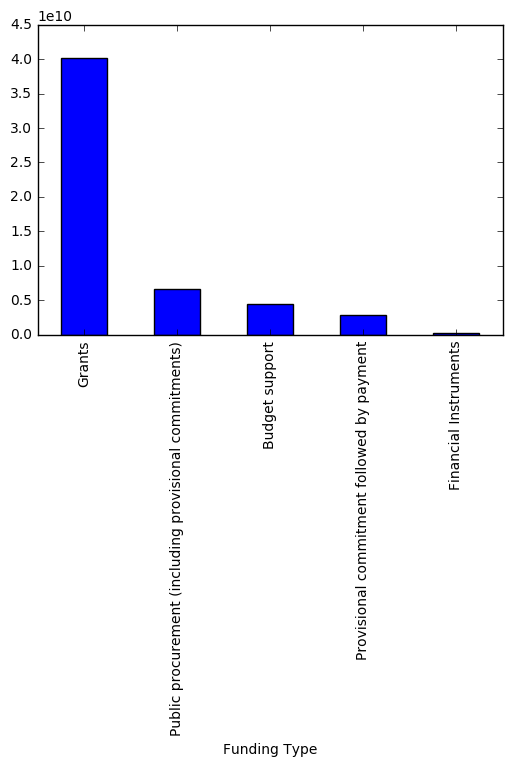

In [41]:
biggest.plot(kind="bar")

### Which countries got the most money?

In [78]:
dataset.groupby("Country / Territory").sum()["Amount"].nlargest(10)

Country / Territory
Belgium          4,170,493,576.47
United Kingdom   3,412,205,344.75
France           3,136,391,701.70
Germany          3,125,872,873.18
Italy            2,156,570,771.63
Spain            2,140,201,798.32
Netherlands      1,369,409,063.09
Luxembourg         843,908,176.14
Denmark            818,494,097.68
Switzerland        705,225,489.33
Name: Amount, dtype: float64

#### make a chart to see the differences better

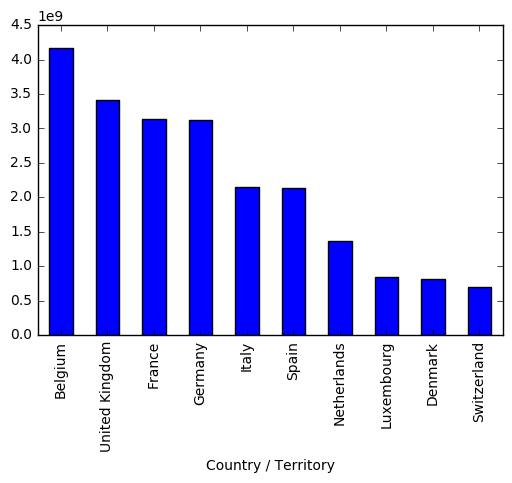

In [79]:
dataset.groupby("Country / Territory").sum()["Amount"].nlargest(10).plot(kind="bar")

### Make a "grants" and "procurement" dataset aan

In [65]:
grants = dataset[dataset["Funding Type"] == "Grants"]
procurement = dataset[dataset["Funding Type"] == "Public procurement (including provisional commitments)"]

### Filter out grants that cost more than 100.000.000

In [83]:
grants[grants["Amount"] > 100000000]

,Year,Name of beneficiary,Coordinator,VAT Number of beneficiary,Address,City,Postal code,Country / Territory,Amount,Geographical Zone,Expense Type,Commitment position key,Subject of grant or contract,Responsible Department,Budget line name and number,Action Type,Funding Type,NUTS2
889,2013,'REPUBLIQUE FRANCAISE*FRENCH REPUBLI...,1;0,;,-;-,-;-,;,France;Italy,"272,856,706.00",NaN,Operational,SI2.516191.8,2007-EU-06010-P : Nouvelle liaison f...,Trans-European Transport Network Exe...,Financial support for projects of co...,TEN-T: Trans-European Transport netw...,Grants,NaN
891,2013,'REPUBLIQUE FRANCAISE*FRENCH REPUBLI...,1;0,;,-;-,-;-,;,France;Belgium,"111,602,539.03",NaN,Operational,SI2.515096.12,2007-EU-30010-P : Liaison fluviale S...,Trans-European Transport Network Exe...,Financial support for projects of co...,TEN-T: Trans-European Transport netw...,Grants,NaN
892,2013,REPUBLIQUE FRANCAISE*FRENCH REPUBLIC,1,NaN,-,-,NaN,France,"104,479,910.00",NaN,Operational,SI2.515449.5,2007-FR-03010-S - COMMISSION DECISIO...,Trans-European Transport Network Exe...,Financial support for projects of co...,TEN-T: Trans-European Transport netw...,Grants,NaN
63212,2015,REINO DE ESPANA*ROYAUME D ESPAGNEKIN...,1,NaN,-,-,NaN,Spain,"193,348,786.40",NaN,Operational,SI2.717937.1,2014-EU-TM-0600-M INEA/CEF/TRAN/M201...,Innovation and Networks Executive Ag...,Removing bottlenecks and bridging mi...,Connecting Europe Facility (CEF),Grants,NaN
63213,2015,ELLINIKI DIMOKRATIA* REPUBLIQUE HELL...,1,NaN,..,.,NaN,Greece,"184,769,792.47",NaN,Operational,SI2.717190.1,2014-EL-TMC-0651-W INEA/CEF/TRAN/M20...,Innovation and Networks Executive Ag...,Connecting Europe Facility (CEF) — C...,Cohesion Fund (CF),Grants,NaN
63214,2015,COMPANIA NATIONALA DE CAI FERATE CFR...,1,RO11054529,BLVD DINICU GOLESCU 38 SECTOR 1,BUCURESTI,010873,Romania,"163,720,222.95",NaN,Operational,SI2.715960.1,THE REHABILITATION OF THE BRASOV  S...,Innovation and Networks Executive Ag...,Connecting Europe Facility (CEF) — C...,Cohesion Fund (CF),Grants,NaN
63217,2015,ELLINIKI DIMOKRATIA* REPUBLIQUE HELL...,1,NaN,..,.,NaN,Greece,"121,362,471.11",NaN,Operational,SI2.716922.1,2014-EL-TMC-0268-W INEA/CEF/TRAN/M20...,Innovation and Networks Executive Ag...,Connecting Europe Facility (CEF) — C...,Cohesion Fund (CF),Grants,NaN
63218,2015,BUNDESREPUBLIK DEUTSCHLAND*REPUBLIQU...,1,NaN,-,-,NaN,Germany,"103,356,642.10",NaN,Operational,SI2.717609.1,2014-DE-TM-0166-W - INEA/CEF/TRAN/M2...,Innovation and Networks Executive Ag...,Removing bottlenecks and bridging mi...,Connecting Europe Facility (CEF),Grants,NaN
63219,2015,UNITED NATIONS RELIEF AND WORKS AGEN...,1,NaN,.,.,.,Jordan,"100,232,434.82",West Bank and Gaza Strip,Operational,SCR.CTR.352899.01.1,CONTRIBUTION TO UNRWA'S 2015 REGULAR...,Directorate-General for Neighbourhoo...,Support to peace process and financi...,European Neighbourhood Instrument (ENI),Grants,NaN


### Which countries got the most projects?

In [96]:
dataset["Country / Territory"].value_counts().nlargest()

Belgium           21607
United Kingdom     6614
France             6532
Germany            5309
Luxembourg         5279
Name: Country / Territory, dtype: int64

### Which department allocates most money?

### Which department allocates most projects?

### What types of expenses are there?

### How much money is spent on each of these types in total?

#### Make a chart out of it to see the difference better

### Which of these types is more expensive on average?

### What were the most expensive projects in Denmark?

### What were the most expensive projects in Microsoft got?

In [102]:
dataset[dataset["Name of beneficiary"].str.contains("MICROSOFT")].nlargest(5, "Amount")

,Year,Name of beneficiary,Coordinator,VAT Number of beneficiary,Address,City,Postal code,Country / Territory,Amount,Geographical Zone,Expense Type,Commitment position key,Subject of grant or contract,Responsible Department,Budget line name and number,Action Type,Funding Type,NUTS2
64253,2015,'ELLINIKO KENTRO KENOTOMIAS MICROSOF...,0;0;0;0;0;0;0;0;0;0;1,EL997873288;EL099785242;DE129515865;...,VASSILISSIS SOPHIAS AVENUE 103 AND;...,ATHINA;THERMI THESSALONIKI;MUNCHEN;L...,11521;57001;80686;1649 004;15124;WC2...,Greece;Greece;Germany;Portugal;Greec...,"3,921,302.50",NaN,Operational,JAG.41932.1,690494 - I-PROGNOSIS - INTELLIGENT P...,Directorate-General for Communicatio...,Improving lifelong health and well-b...,The Framework Programme for Research...,Grants,NaN
38203,2014,MICROSOFT NV*,1,BE0437910359,DAVINCILAAN 3 BAYREUTH BUILDING,ZAVENTEM,1935,Belgium,"499,850.00",NaN,Administrative,SLG.CMM.2014.15696.1,ANALYST/CONSULTANT/ARCHITECT/EXPERT/...,Directorate-General for Informatics,Expenditure related to information a...,XX Administrative expenditure alloca...,Public procurement (including provis...,NaN
69291,2015,MICROSOFT NV*,1,BE0437910359,DAVINCILAAN 3 BAYREUTH BUILDING,ZAVENTEM,1935,Belgium,"499,850.00",NaN,Administrative,SLG.CMM.2015.15801.1,ANALYST/CONSULTANT/ARCHITECT/EXPERT/...,Directorate-General for Informatics,Expenditure related to information a...,XX Administrative expenditure alloca...,Public procurement (including provis...,NaN
7175,2013,MICROSOFT NV*,0,BE0437910359,DAVINCILAAN 3 BAYREUTH BUILDING,ZAVENTEM,1935,Belgium,"498,000.00",NaN,Administrative,SLG.CMM.2013.10091.1,Analyst/Consultant/Architect/Expert/...,Directorate-General for Informatics,Office for Infrastructure and Logist...,26 Commission's administration,Public procurement (including provis...,NaN
8289,2013,MICROSOFT NV*,1,BE0437910359,DAVINCILAAN 3 BAYREUTH BUILDING,ZAVENTEM,1935,Belgium,"351,000.00",NaN,Administrative,SLG.CMM.2013.12853.1,ANALYST/CONSULTANT/ARCHITECT/EXPERT/...,Directorate-General for Informatics,Expenditure related to information a...,XX Administrative expenditure alloca...,Public procurement (including provis...,NaN


### How much money did Microsoft get in the years 2013-2015 from the European Comission?

In [104]:
dataset[dataset["Name of beneficiary"].str.contains("MICROSOFT")].groupby("Year").sum()["Amount"]

Year
2013   1,792,943.00
2014   1,181,982.00
2015   5,065,782.50
Name: Amount, dtype: float64